<a href="https://colab.research.google.com/github/akhaire21/Python-Projects/blob/master/GaussianMixtureModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# example of fitting a gaussian mixture model with expectation maximization
from numpy import hstack
from numpy.random import normal
from sklearn.mixture import GaussianMixture
# generate a sample
X1 = normal(loc=20, scale=5, size=3000)
X2 = normal(loc=40, scale=5, size=7000)
X = hstack((X1, X2))

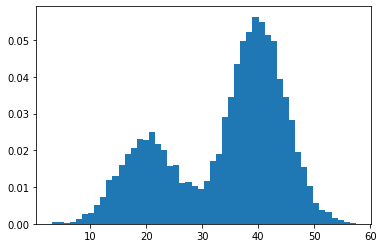

In [ ]:
# plot the histogram
from matplotlib import pyplot
pyplot.hist(X, bins=50, density=True)
pyplot.show()

We can model the problem of estimating the density of this dataset using a Gaussian Mixture Model.
The GaussianMixture scikit-learn class can be used to model this problem and estimate the parameters of the distributions using the expectation-maximization algorithm.

In [ ]:
# reshape into a table with one column
X = X.reshape((len(X), 1))
# fit model
#The class allows us to specify the suspected number of underlying processes 
#used to generate the data via the n_components argument when defining the model 
#We will set this to 2 for the two processes or distributions.

#If the number of processes was not known, a range of different numbers of 
#components could be tested and the model with the best fit could be chosen, 
#where models could be evaluated using scores such as Akaike or 
#Bayesian Information Criterion (AIC or BIC).

model = GaussianMixture(n_components=2, init_params='random')
model.fit(X)

GaussianMixture(init_params='random', n_components=2)

Once the model is fit, we can access the learned parameters via arguments on the model, such as the means, covariances, mixing weights, and more.

More usefully, we can use the fit model to estimate the latent parameters for existing and new data points.

For example, we can estimate the latent variable for the points in the training dataset and we would expect the first 3,000 points to belong to one process (e.g. value=1) and the next 7,000 data points to belong to a different process (e.g. value=0).

In [ ]:
# predict latent values
yhat = model.predict(X)
# check latent value for first few points
print(yhat[:100])
# check latent value for last few points
print(yhat[-100:])

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
